In [276]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import wilcoxon
from __future__ import division
import pandas as pd
import random
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

In [277]:
# CSI1
'''
person = [0.73, 0.71, 0.79, 0.77, 0.65, 0.82, 0.77, 0.79]
person_rand = [0.51, 0.48, 0.45, 0.49, 0.46, 0.5 , 0.54, 0.48]
face = [0.83, 0.83, 0.85, 0.77, 0.72, 0.84, 0.77, 0.78]
face_rand = [0.56, 0.48, 0.48, 0.57, 0.51, 0.48, 0.47, 0.45]
animal = [0.73, 0.69, 0.83, 0.8,  0.71, 0.76, 0.78, 0.81]
animal_rand = [0.5,  0.49, 0.56, 0.52, 0.53, 0.58, 0.47, 0.5 ]
vehicle = [0.63, 0.67, 0.72, 0.64, 0.66, 0.63, 0.64, 0.72]
vehicle_rand = [0.48, 0.54, 0.46, 0.52, 0.52, 0.47, 0.48, 0.55]
outdoor = [0.57, 0.6,  0.55, 0.54, 0.5,  0.58, 0.53, 0.57]
outdoor_rand = [0.52, 0.52, 0.42, 0.4,  0.42, 0.45, 0.51, 0.46]
sports = [0.72, 0.71, 0.8,  0.68, 0.71, 0.73, 0.77, 0.69]
sports_rand = [0.48, 0.42, 0.52, 0.53, 0.52, 0.55, 0.42, 0.53]
food = [0.76, 0.56, 0.76, 0.69, 0.77, 0.71, 0.53, 0.65]
food_rand = [0.5,  0.56, 0.47, 0.52, 0.48, 0.45, 0.41, 0.46]
furniture = [0.59, 0.58, 0.68, 0.6,  0.63, 0.65, 0.65, 0.64]
furniture_rand = [0.47, 0.47, 0.48, 0.49, 0.54, 0.52, 0.52, 0.48]
tool = [0.61, 0.6,  0.63, 0.58, 0.55, 0.57, 0.56, 0.57]
tool_rand = [0.52, 0.51, 0.51, 0.49, 0.47, 0.53, 0.48, 0.53]
'''
person = [0.77, 0.8, 0.81, 0.78, 0.79, 0.79, 0.8, 0.81]
person_rand = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.51]
face = [0.89, 0.85, 0.83, 0.86, 0.88, 0.89, 0.84, 0.81]
face_rand = [0.5, 0.5, 0.5, 0.51, 0.5, 0.51, 0.5, 0.5]
animal = [0.78, 0.8, 0.83, 0.79, 0.85, 0.83, 0.75, 0.81]
animal_rand = [0.49, 0.5, 0.5, 0.51, 0.5, 0.5, 0.5, 0.5]
vehicle = [0.56, 0.73, 0.72, 0.55, 0.64, 0.61, 0.68, 0.62]
vehicle_rand = [0.52, 0.5, 0.5, 0.49, 0.5, 0.5, 0.52, 0.5]
outdoor = [0.55, 0.45, 0.58, 0.5, 0.58, 0.55, 0.59, 0.55]
outdoor_rand = [0.54, 0.53, 0.42, 0.4, 0.49, 0.54, 0.48, 0.51]
sports = [0.79, 0.79, 0.79, 0.67, 0.69, 0.75, 0.83, 0.71]
sports_rand = [0.52, 0.5, 0.5, 0.47, 0.56, 0.52, 0.5, 0.52]
food = [0.89, 0.79, 0.82, 0.86, 0.69, 0.73, 0.84, 0.77]
food_rand = [0.53, 0.53, 0.53, 0.59, 0.46, 0.55, 0.53, 0.44]
furniture = [0.6, 0.69, 0.69, 0.65, 0.52, 0.7, 0.75, 0.69]
furniture_rand = [0.5, 0.49, 0.51, 0.47, 0.47, 0.5, 0.51, 0.5] 
#tool = [0.6, 0.6, 0.61, 0.62, 0.62, 0.64, 0.56, 0.56]
#tool_rand = [0.5, 0.5, 0.5, 0.49, 0.5, 0.5, 0.5, 0.5]

In [278]:
def process(categories, categories_rand, names):
    CTEs = [np.mean(c) for c in categories]
    CTEs_rand = [np.mean(c) for c in categories_rand]
    error = [np.std(c) for c in categories]
    error_rand = [np.std(c) for c in categories_rand]
    x_pos = np.arange(len(categories))*5
    return CTEs, CTEs_rand, error, error_rand, x_pos

In [279]:
# Build the plot
def build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, title, leg_loc):
    plt.rc('font', size=12)
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 6)
    plt.yticks(np.arange(0, 1, 0.1))
    ax.bar(x_pos, CTEs, yerr=error, align='center', color='white', alpha=1, ecolor='blue', capsize=12, width=2, edgecolor='blue')
    ax.bar(x_pos+2, CTEs_rand, yerr=error_rand, align='center', color='white',alpha=1, ecolor='red', capsize=12, width=2, edgecolor='red')
    ax.set_ylabel('AUC')
    ax.set_xticks(x_pos+1)
    ax.set_xticklabels(names)
    ax.set_title(title)
    #ax.yaxis.grid(True)
    ax.legend(['Model', 'Random'], loc=leg_loc)
    ax.patches
    i = 0
    for p, pval in zip(ax.patches, pvals_corrected):
        if pval < 0.001:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '***', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.01:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '**', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.05:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '*', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        # ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 'n.s.', ha='center')
        i += 1
    # Save the figure and show
    # plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()
    return

In [280]:
def ttest(names, categories, categories_rand):
    pvals = []
    for r, u, v in zip(names, categories, categories_rand):
        print(r,':')
        t_stat = stats.ttest_ind(u, v).statistic
        pval = stats.ttest_ind(u, v).pvalue / 2
        print('t-statistic:', t_stat, 'p-value:', pval)
        pvals.append(pval)
    # Create a list of the adjusted p-values
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='bonferroni') 
    print("Bonferroni:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='fdr_bh') # Benjamini/Hochberg
    print("Benjamini/Hochberg:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    return pvals_corrected

face :
t-statistic: 33.79050710883306 p-value: 4.028404885980581e-15
animal :
t-statistic: 26.532489008251257 p-value: 1.1323341836590819e-13
person :
t-statistic: 56.99330915235217 p-value: 2.8132073328292115e-18
furniture :
t-statistic: 6.474973631015669 p-value: 7.304970668189162e-06
vehicle :
t-statistic: 5.588818216663838 p-value: 3.33885955961855e-05
sports :
t-statistic: 10.899060585210592 p-value: 1.591807131357507e-08
food :
t-statistic: 9.532302306463615 p-value: 8.425679184294151e-08
outdoor :
t-statistic: 2.1790877140657146 p-value: 0.023450437671670748
Bonferroni:

Reject: [ True  True  True  True  True  True  True False]
pvals corrected: [3.22272391e-14 9.05867347e-13 2.25056587e-17 5.84397653e-05
 2.67108765e-04 1.27344571e-07 6.74054335e-07 1.87603501e-01]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True  True  True  True]
pvals corrected: [1.61136195e-14 3.01955782e-13 2.25056587e-17 9.73996089e-06
 3.81583950e-05 3.18361426e-08 1.34810867e-07 2.34504377e-02

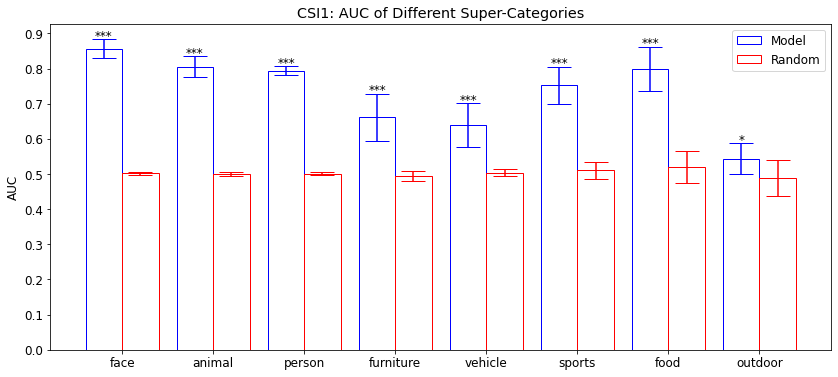

In [281]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand]
categories1 = categories
categories1_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI1: AUC of Different Super-Categories', leg_loc='upper right')

In [282]:
# CSI2
'''
person = [0.64, 0.66, 0.71, 0.73, 0.75, 0.63, 0.68, 0.61]
person_rand = [0.47, 0.5,  0.51, 0.49, 0.46, 0.54, 0.48, 0.51]
face = [0.79, 0.76, 0.76, 0.76, 0.69, 0.7,  0.75, 0.78]
face_rand = [0.48, 0.5,  0.53, 0.48, 0.54, 0.56, 0.45, 0.53]
animal = [0.63, 0.61, 0.64, 0.6,  0.64, 0.58, 0.67, 0.66]
animal_rand = [0.54, 0.53, 0.51, 0.54, 0.58, 0.5,  0.52, 0.54]
vehicle = [0.57, 0.64, 0.55, 0.6,  0.63, 0.64, 0.59, 0.52]
vehicle_rand = [0.45, 0.54, 0.48, 0.54, 0.5,  0.48, 0.55, 0.52]
outdoor = [0.52, 0.55, 0.55, 0.47, 0.55, 0.54, 0.57, 0.51]
outdoor_rand = [0.52, 0.49, 0.45, 0.46, 0.5,  0.51, 0.51, 0.56]
sports = [0.58, 0.64, 0.74, 0.69, 0.62, 0.58, 0.56, 0.68]
sports_rand = [0.5,  0.47, 0.56, 0.49, 0.51, 0.47, 0.59, 0.49]
food = [0.63, 0.63, 0.64, 0.56, 0.55, 0.61, 0.59, 0.49]
food_rand = [0.47, 0.45, 0.46, 0.51, 0.53, 0.54, 0.47, 0.52]
furniture = [0.58, 0.54, 0.61, 0.56, 0.49, 0.62, 0.56, 0.57]
furniture_rand = [0.58, 0.55, 0.45, 0.6,  0.48, 0.5,  0.57, 0.53]
tool = [0.57, 0.52, 0.51, 0.61, 0.54, 0.49, 0.52, 0.48]
tool_rand = [0.52, 0.54, 0.46, 0.46, 0.55, 0.52, 0.47, 0.54]
'''
person = [0.74, 0.76, 0.79, 0.74, 0.73, 0.76, 0.78, 0.75]
person_rand =[0.52, 0.5, 0.49, 0.5, 0.49, 0.49, 0.5, 0.51]
face = [0.8, 0.68, 0.83, 0.83, 0.8, 0.81, 0.79, 0.85]
face_rand = [0.48, 0.49, 0.5, 0.5, 0.48, 0.51, 0.5, 0.47]
animal = [0.6, 0.71, 0.72, 0.6, 0.63, 0.73, 0.73, 0.69]
animal_rand = [0.5, 0.5, 0.5, 0.51, 0.48, 0.48, 0.5, 0.49]
vehicle = [0.56, 0.59, 0.62, 0.57, 0.56, 0.62, 0.6, 0.59]
vehicle_rand = [0.49, 0.5, 0.5, 0.52, 0.51, 0.52, 0.5, 0.49]
outdoor = [0.49, 0.59, 0.66, 0.65, 0.49, 0.52, 0.59, 0.5]
outdoor_rand = [0.47, 0.53, 0.54, 0.59, 0.48, 0.48, 0.49, 0.48]
sports = [0.79, 0.72, 0.79, 0.72, 0.75, 0.76, 0.75, 0.66]
sports_rand = [0.5, 0.41, 0.5, 0.54, 0.51, 0.55, 0.51, 0.46]
food = [0.73, 0.53, 0.68, 0.59, 0.61, 0.57, 0.58, 0.59]
food_rand = [0.55, 0.56, 0.46, 0.5, 0.49, 0.46, 0.46, 0.46]
furniture = [0.53, 0.58, 0.65, 0.65, 0.55, 0.68, 0.58, 0.64]
furniture_rand = [0.49, 0.46, 0.53, 0.51, 0.47, 0.5, 0.5, 0.49]
#tool = [0.56, 0.53, 0.54, 0.52, 0.54, 0.52, 0.59, 0.55]
#tool_rand = [0.5, 0.48, 0.43, 0.5, 0.49, 0.5, 0.53, 0.49]

face :
t-statistic: 16.20064710259288 p-value: 9.149636734329771e-11
animal :
t-statistic: 8.831430837708547 p-value: 2.1269724022944742e-07
person :
t-statistic: 31.158860496795207 p-value: 1.236076432343131e-14
furniture :
t-statistic: 5.478974452983645 p-value: 4.0614883859869227e-05
vehicle :
t-statistic: 8.928837434461144 p-value: 1.8642601048600528e-07
sports :
t-statistic: 11.220299955265997 p-value: 1.102295575098209e-08
food :
t-statistic: 4.334579376572821 p-value: 0.00034305813074176033
outdoor :
t-statistic: 1.8506701903580132 p-value: 0.04271491316547292
Bonferroni:

Reject: [ True  True  True  True  True  True  True False]
pvals corrected: [7.31970939e-10 1.70157792e-06 9.88861146e-14 3.24919071e-04
 1.49140808e-06 8.81836460e-08 2.74446505e-03 3.41719305e-01]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True  True  True  True]
pvals corrected: [3.65985469e-10 3.40315584e-07 9.88861146e-14 5.41531785e-05
 3.40315584e-07 2.93945487e-08 3.92066435e-04 4.27149132e-

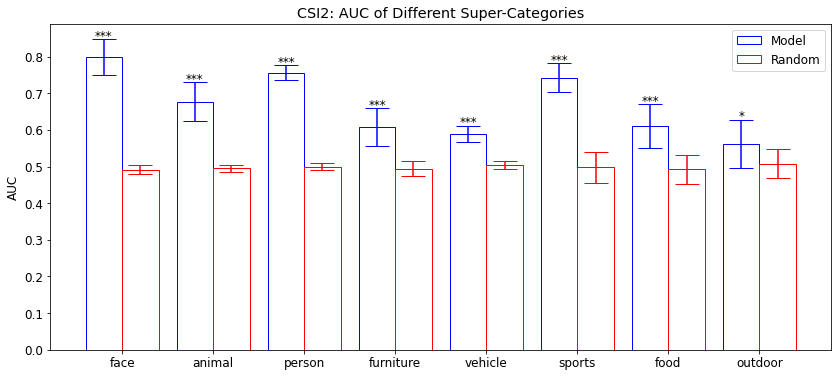

In [283]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand]
categories2 = categories
categories2_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI2: AUC of Different Super-Categories', leg_loc='upper right')

In [284]:
# CSI3
'''
person = [0.74, 0.7,  0.79, 0.74, 0.71, 0.82, 0.65, 0.74]
person_rand = [0.48, 0.52, 0.48, 0.51, 0.54, 0.5,  0.45, 0.45]
face = [0.74, 0.84, 0.83, 0.78, 0.77, 0.81, 0.72, 0.76]
face_rand = [0.54, 0.49, 0.48, 0.44, 0.54, 0.5,  0.5,  0.5 ]
animal = [0.62, 0.65, 0.72, 0.7,  0.69, 0.74, 0.67, 0.63]
animal_rand = [0.49, 0.51, 0.49, 0.5,  0.48, 0.52, 0.52, 0.5 ]
vehicle = [0.58, 0.6,  0.59, 0.66, 0.6,  0.62, 0.6,  0.6 ]
vehicle_rand = [0.46, 0.58, 0.51, 0.49, 0.52, 0.43, 0.43, 0.5 ]
outdoor = [0.57, 0.57, 0.59, 0.56, 0.53, 0.59, 0.58, 0.64]
outdoor_rand = [0.43, 0.46, 0.47, 0.48, 0.43, 0.44, 0.46, 0.51]
sports = [0.69, 0.65, 0.76, 0.65, 0.61, 0.63, 0.67, 0.76]
sports_rand = [0.57, 0.51, 0.4,  0.44, 0.54, 0.49, 0.52, 0.39]
food = [0.57, 0.64, 0.58, 0.71, 0.62, 0.62, 0.5,  0.78]
food_rand = [0.44, 0.41, 0.57, 0.63, 0.46, 0.46, 0.5,  0.56]
furniture = [0.53, 0.57, 0.53, 0.59, 0.57, 0.59, 0.5,  0.51]
furniture_rand = [0.49, 0.59, 0.5,  0.55, 0.41, 0.55, 0.51, 0.48]
tool = [0.55, 0.59, 0.5,  0.55, 0.53, 0.48, 0.53, 0.49]
tool_rand = [0.57, 0.47, 0.52, 0.5,  0.54, 0.48, 0.55, 0.46]
'''
person = [0.75, 0.82, 0.79, 0.79, 0.74, 0.78, 0.75, 0.77]
person_rand = [0.5, 0.5, 0.51, 0.5, 0.5, 0.5, 0.48, 0.5]
face = [0.76, 0.81, 0.88, 0.87, 0.8, 0.78, 0.78, 0.75]
face_rand = [0.5, 0.5, 0.5, 0.58, 0.52, 0.47, 0.53, 0.58]
animal = [0.67, 0.74, 0.69, 0.71, 0.63, 0.63, 0.7, 0.73]
animal_rand = [0.47, 0.49, 0.5, 0.49, 0.5, 0.51, 0.55, 0.51]
vehicle = [0.56, 0.64, 0.57, 0.63, 0.52, 0.65, 0.58, 0.61]
vehicle_rand = [0.5, 0.5, 0.5, 0.5, 0.45, 0.5, 0.48, 0.5]
outdoor = [0.39, 0.63, 0.55, 0.57, 0.5, 0.57, 0.56, 0.57]
outdoor_rand = [0.52, 0.52, 0.51, 0.45, 0.54, 0.47, 0.48, 0.49]
sports = [0.71, 0.78, 0.75, 0.76, 0.6, 0.63, 0.72, 0.74]
sports_rand = [0.5, 0.5, 0.43, 0.49, 0.53, 0.5, 0.5, 0.52]
food = [0.58, 0.66, 0.57, 0.65, 0.62, 0.68, 0.65, 0.79]
food_rand = [0.54, 0.48, 0.55, 0.59, 0.49, 0.6, 0.51, 0.48]
furniture = [0.61, 0.62, 0.6, 0.68, 0.52, 0.62, 0.52, 0.61]
furniture_rand = [0.53, 0.5, 0.5, 0.5, 0.5, 0.51, 0.5, 0.49]
#tool = [0.61, 0.47, 0.5, 0.5, 0.51, 0.49, 0.52, 0.62]
#tool_rand = [0.5, 0.49, 0.5, 0.5, 0.49, 0.5, 0.5, 0.5]

face :
t-statistic: 12.776197785256635 p-value: 2.083429447004492e-09
animal :
t-statistic: 10.9791110980418 p-value: 1.4513408307579569e-08
person :
t-statistic: 27.812155287484636 p-value: 5.923561880344544e-14
furniture :
t-statistic: 4.825457329496714 p-value: 0.00013468747490515882
vehicle :
t-statistic: 6.046509152729445 p-value: 1.5025480743524739e-05
sports :
t-statistic: 8.640208814801536 p-value: 2.7636869246086687e-07
food :
t-statistic: 4.065044915364948 p-value: 0.0005793211878811971
outdoor :
t-statistic: 1.6490677549547965 p-value: 0.06069151183431501
Bonferroni:

Reject: [ True  True  True  True  True  True  True False]
pvals corrected: [1.66674356e-08 1.16107266e-07 4.73884950e-13 1.07749980e-03
 1.20203846e-04 2.21094954e-06 4.63456950e-03 4.85532095e-01]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True  True  True False]
pvals corrected: [8.33371779e-09 3.87024222e-08 4.73884950e-13 1.79583300e-04
 2.40407692e-05 5.52737385e-07 6.62081358e-04 6.06915118e-0

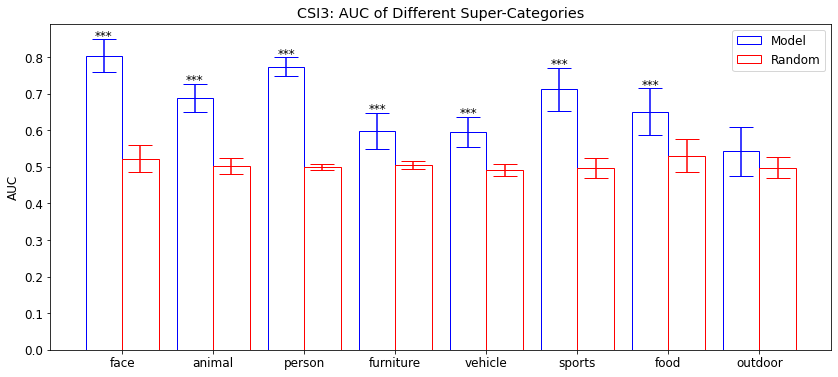

In [285]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand]
categories3 = categories
categories3_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI3: AUC of Different Super-Categories', leg_loc='upper right')

In [286]:
# CSI4
'''
person = [0.5,  0.58, 0.54, 0.65, 0.6,  0.69, 0.62, 0.65]
person_rand = [0.55, 0.48, 0.5,  0.53, 0.48, 0.5,  0.5,  0.5 ]
face = [0.56, 0.62, 0.73, 0.67, 0.6,  0.68, 0.57, 0.75]
face_rand = [0.52, 0.53, 0.55, 0.52, 0.51, 0.51, 0.52, 0.56]
animal = [0.62, 0.63, 0.53, 0.49, 0.53, 0.58, 0.56, 0.68]
animal_rand = [0.57, 0.47, 0.54, 0.45, 0.5,  0.51, 0.52, 0.47]
vehicle = [0.55, 0.51, 0.39, 0.47, 0.53, 0.5,  0.46, 0.64]
vehicle_rand = [0.49, 0.57, 0.41, 0.42, 0.51, 0.44, 0.54, 0.41]
outdoor = [0.49, 0.57, 0.51, 0.67, 0.56, 0.42, 0.53, 0.69]
outdoor_rand = [0.41, 0.47, 0.6,  0.45, 0.58, 0.55, 0.56, 0.48]
sports = [0.52, 0.58, 0.57, 0.57, 0.61, 0.54, 0.58, 0.62]
sports_rand = [0.59, 0.59, 0.57, 0.47, 0.49, 0.55, 0.45, 0.57]
food = [0.52, 0.57, 0.54, 0.55, 0.58, 0.54, 0.56, 0.56]
food_rand = [0.47, 0.55, 0.4,  0.61, 0.55, 0.54, 0.55, 0.46]
furniture = [0.51, 0.55, 0.53, 0.51, 0.63, 0.53, 0.53, 0.51]
furniture_rand = [0.56, 0.48, 0.55, 0.48, 0.53, 0.55, 0.51, 0.53]
tool = [0.58, 0.49, 0.47, 0.49, 0.49, 0.59,0.49, 0.5 ]
tool_rand = [0.53, 0.41, 0.55, 0.53, 0.49, 0.55, 0.53, 0.51]
'''
person = [0.61, 0.69, 0.71, 0.73, 0.68, 0.67, 0.57, 0.66]
person_rand = [0.5, 0.52, 0.44, 0.5, 0.49, 0.49, 0.5, 0.45]
face = [0.75, 0.8, 0.8, 0.61, 0.7, 0.78, 0.77, 0.67]
face_rand = [0.45, 0.5, 0.49, 0.49, 0.52, 0.52, 0.5, 0.55]
animal = [0.76, 0.73, 0.71, 0.53, 0.58, 0.75, 0.75, 0.69]
animal_rand = [0.53, 0.45, 0.52, 0.5, 0.49, 0.53, 0.47, 0.44]
vehicle = [0.59, 0.6, 0.61, 0.59, 0.64, 0.53, 0.56, 0.71]
vehicle_rand = [0.53, 0.36, 0.42, 0.54, 0.54, 0.57, 0.48, 0.6]
outdoor = [0.61, 0.49, 0.54, 0.55, 0.5, 0.54, 0.53, 0.59]
outdoor_rand = [0.62, 0.36, 0.49, 0.54, 0.55, 0.43, 0.54, 0.56]
sports = [0.55, 0.53, 0.59, 0.67, 0.71, 0.64, 0.5, 0.59]
sports_rand = [0.45, 0.58, 0.54, 0.55, 0.48, 0.58, 0.44, 0.43]
food = [0.69, 0.47, 0.45, 0.64, 0.49, 0.6, 0.66, 0.75]
food_rand = [0.49, 0.44, 0.47, 0.52, 0.51, 0.57, 0.56, 0.51]
furniture = [0.51, 0.61, 0.54, 0.5, 0.63, 0.57, 0.61, 0.44]
furniture_rand = [0.48, 0.41, 0.47, 0.49, 0.56, 0.55, 0.48, 0.52]
#tool = [0.57, 0.51, 0.53, 0.51, 0.54, 0.51, 0.47, 0.58]
#tool_rand = [0.52, 0.46, 0.62, 0.6, 0.54, 0.47, 0.55, 0.58]

face :
t-statistic: 8.815830666851433 p-value: 2.1725695689245818e-07
animal :
t-statistic: 5.973796625432348 p-value: 1.7024624817951845e-05
person :
t-statistic: 8.565573040793636 p-value: 3.0645139346516664e-07
furniture :
t-statistic: 1.9523084976557428 p-value: 0.03559732549059625
vehicle :
t-statistic: 2.8854966816262335 p-value: 0.005990225730278753
sports :
t-statistic: 2.6963165213088756 p-value: 0.008690782736309282
food :
t-statistic: 2.0107132501103604 p-value: 0.0320121122011581
outdoor :
t-statistic: 1.0023327356477851 p-value: 0.16659672484857957
Bonferroni:

Reject: [ True  True  True False  True False False False]
pvals corrected: [1.73805566e-06 1.36196999e-04 2.45161115e-06 2.84778604e-01
 4.79218058e-02 6.95262619e-02 2.56096898e-01 1.00000000e+00]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True  True  True False]
pvals corrected: [1.22580557e-06 4.53989995e-05 1.22580557e-06 4.06826577e-02
 1.19804515e-02 1.39052524e-02 4.06826577e-02 1.66596725e-01]


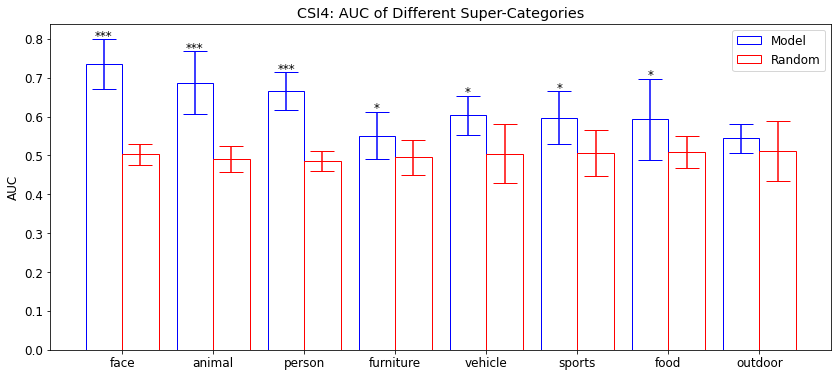

In [287]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand]
categories4 = categories
categories4_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI4: AUC of Different Super-Categories', leg_loc='upper right')

In [288]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor']
cat1 = np.mean(np.array(categories1), axis=1)
cat2 = np.mean(np.array(categories2), axis=1)
cat3 = np.mean(np.array(categories3), axis=1)
cat4 = np.mean(np.array(categories4), axis=1)
categories = np.array([cat1, cat2, cat3, cat4])
cat1_rand = np.mean(np.array(categories1_rand), axis=1)
cat2_rand = np.mean(np.array(categories2_rand), axis=1)
cat3_rand = np.mean(np.array(categories3_rand), axis=1)
cat4_rand = np.mean(np.array(categories4_rand), axis=1)
categories_rand = np.array([cat1_rand, cat2_rand, cat3_rand, cat4_rand])
print('Model:\n', np.round(np.transpose(categories),2))
print('Random:\n',np.round(np.transpose(categories_rand),2))

def sample(data):
    sample = [random.choice(data) for _ in range(len(data))]
    return sample

def bootstrap_t_test(treatment, control, nboot = 1000, direction = "greater"):
    ones = np.vstack((np.ones(len(treatment)),treatment))
    treatment = ones.conj().transpose()
    zeros = np.vstack((np.zeros(len(control)), control))
    control = zeros.conj().transpose()
    Z = np.vstack((treatment, control))
    tstat = np.mean(treatment[:,1])-np.mean(control[:,1])
    tboot = np.zeros(nboot)
    for i in range(nboot):
        sboot = sample(Z)
        sboot = pd.DataFrame(np.array(sboot), columns=['treat', 'vals'])
        tboot[i] = np.mean(sboot['vals'][sboot['treat'] == 1]) - np.mean(sboot['vals'][sboot['treat'] == 0]) - tstat
    if direction == "greater":
        pvalue = np.sum(tboot>=tstat-0)/nboot
    elif direction == "less":
        pvalue = np.sum(tboot<=tstat-0)/nboot
    else:
        print('Enter a valid arg for direction')

    return pvalue

Model:
 [[0.86 0.8  0.8  0.74]
 [0.8  0.68 0.69 0.69]
 [0.79 0.76 0.77 0.66]
 [0.66 0.61 0.6  0.55]
 [0.64 0.59 0.6  0.6 ]
 [0.75 0.74 0.71 0.6 ]
 [0.8  0.61 0.65 0.59]
 [0.54 0.56 0.54 0.54]]
Random:
 [[0.5  0.49 0.52 0.5 ]
 [0.5  0.5  0.5  0.49]
 [0.5  0.5  0.5  0.49]
 [0.49 0.49 0.5  0.5 ]
 [0.5  0.5  0.49 0.5 ]
 [0.51 0.5  0.5  0.51]
 [0.52 0.49 0.53 0.51]
 [0.49 0.51 0.5  0.51]]


face :
statistic: 16.0 p-value: 0.014700524095169821
animal :
statistic: 16.0 p-value: 0.014700524095169821
person :
statistic: 16.0 p-value: 0.014285714285714285
furniture :
statistic: 16.0 p-value: 0.014700524095169821
vehicle :
statistic: 16.0 p-value: 0.014700524095169821
sports :
statistic: 16.0 p-value: 0.014285714285714285
food :
statistic: 16.0 p-value: 0.014285714285714285
outdoor :
statistic: 16.0 p-value: 0.014285714285714285


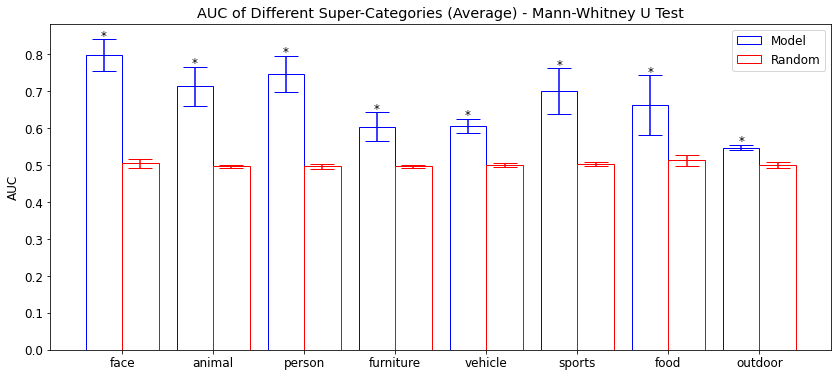

In [289]:
# Mann-Whitney U Test
CTEs, CTEs_rand, error, error_rand, x_pos = process(np.transpose(categories), np.transpose(categories_rand), names)
pvals = []
for r, u, v in zip(names, np.transpose(categories), np.transpose(categories_rand)):
    print(r,':')
    stat, pval = mannwhitneyu(u, v, alternative='greater')
    print('statistic:', stat, 'p-value:', pval)
    pvals.append(pval)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals,
           'AUC of Different Super-Categories (Average) - Mann-Whitney U Test', leg_loc='upper right')

face :
statistic: 10.0 p-value: 0.0625
animal :
statistic: 10.0 p-value: 0.0625
person :
statistic: 10.0 p-value: 0.0625
furniture :
statistic: 10.0 p-value: 0.0625
vehicle :
statistic: 10.0 p-value: 0.0625
sports :
statistic: 10.0 p-value: 0.0625
food :
statistic: 10.0 p-value: 0.0625
outdoor :
statistic: 10.0 p-value: 0.0625


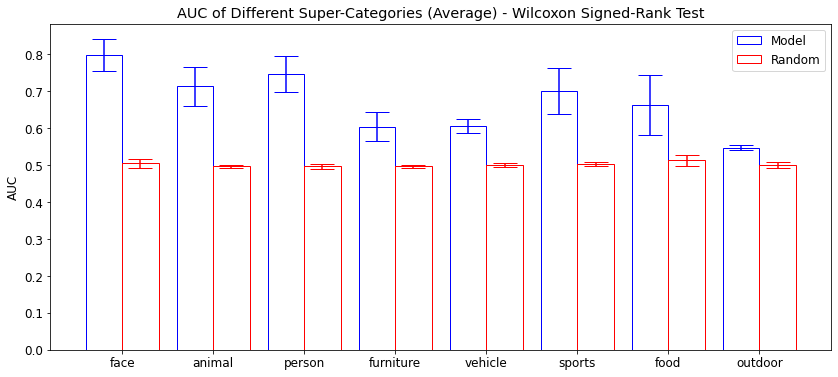

In [290]:
# Wilcoxon signed-rank test
CTEs, CTEs_rand, error, error_rand, x_pos = process(np.transpose(categories), np.transpose(categories_rand), names)
pvals = []
for r, u, v in zip(names, np.transpose(categories), np.transpose(categories_rand)):
    print(r,':')
    stat, pval = wilcoxon(u, v, alternative='greater')
    # stat, pval = kruskal(u, v)
    print('statistic:', stat, 'p-value:', pval)
    pvals.append(pval)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals,
           'AUC of Different Super-Categories (Average) - Wilcoxon Signed-Rank Test', leg_loc='upper right')

face :
statistic: 10.0 p-value: 0.0
animal :
statistic: 10.0 p-value: 0.0
person :
statistic: 10.0 p-value: 0.0
furniture :
statistic: 10.0 p-value: 0.0
vehicle :
statistic: 10.0 p-value: 0.0
sports :
statistic: 10.0 p-value: 0.0
food :
statistic: 10.0 p-value: 0.0
outdoor :
statistic: 10.0 p-value: 0.0


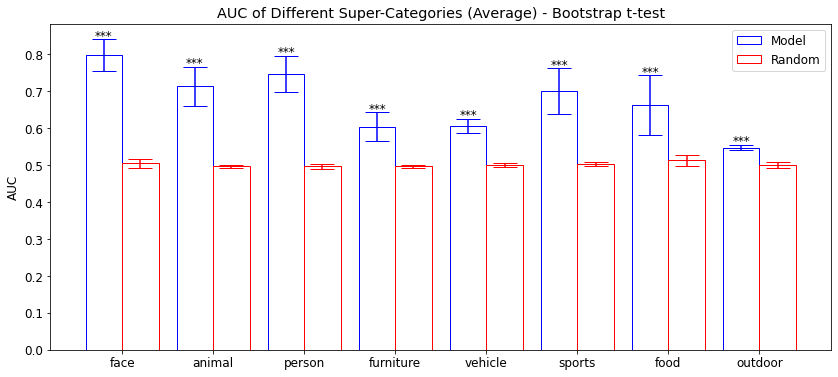

In [291]:
# Bootstrap t-test
CTEs, CTEs_rand, error, error_rand, x_pos = process(np.transpose(categories), np.transpose(categories_rand), names)
pvals = []
for r, u, v in zip(names, np.transpose(categories), np.transpose(categories_rand)):
    print(r,':')
    pval = bootstrap_t_test(u, v)
    print('statistic:', stat, 'p-value:', pval)
    pvals.append(pval)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals,
           'AUC of Different Super-Categories (Average) - Bootstrap t-test', leg_loc='upper right')
